#Speed Dating Match Prediction


##Problem Formulation
We are going to predict the outcome of a specific speed dating session based on the profile of two people, so we can implement a recommendation system to better match people in speed dating events.

The problem is the dataset has a lot of missing values and highly unbalanced(mostly unmatched).

## Data Loading and Exploration

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import libiraries
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.feature_selection import f_classif
from sklearn import linear_model, preprocessing



In [3]:
#read train and test data
data=pd.read_csv('/content/drive/MyDrive/train.csv')
test_=pd.read_csv('/content/drive/MyDrive/test.csv')

In [4]:
#display train data
data

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,0,1,2,9,20,2,2.0,18,1,214.0,...,12.0,12.0,9.0,12.0,NaN,NaN,NaN,NaN,NaN,3390
5905,1,24,2,9,20,19,15.0,5,6,199.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4130
5906,0,13,2,11,21,5,5.0,3,18,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1178
5907,1,10,2,7,16,6,14.0,9,10,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5016


In [5]:
#display test data
test_

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,5,2,2,16,3,NaN,13,13,52.0,...,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,934
1,0,33,2,14,18,6,6.0,4,8,368.0,...,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0,6539
2,1,6,2,9,20,10,16.0,15,19,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6757
3,1,26,2,2,19,15,NaN,8,10,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2275
4,0,29,2,7,16,7,7.0,10,5,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,0,23,2,15,19,18,18.0,14,11,407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7982
2465,0,5,1,13,9,4,4.0,4,8,339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7299
2466,1,26,2,2,19,3,NaN,15,3,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1818
2467,0,19,2,9,20,11,11.0,9,2,215.0,...,7.0,12.0,12.0,9.0,NaN,NaN,NaN,NaN,NaN,937


In [6]:
#display the no. of nulls in each columns
data.isnull().sum().sort_values(ascending=False)

num_in_3    5449
numdat_3    4849
expnum      4627
amb7_2      4519
sinc7_2     4519
            ... 
position       0
round          0
wave           0
condtn         0
id             0
Length: 192, dtype: int64

In [7]:
#display data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


Text(0, 0.5, 'no.')

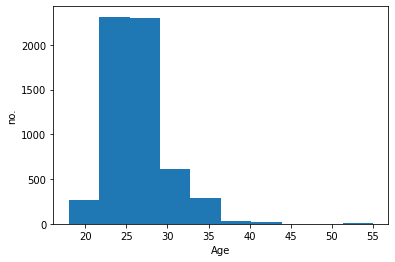

In [8]:
#let us visualize some of data
import matplotlib.pyplot as plt
age = data[np.isfinite(data['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('no.')

In [9]:
#the data unbalanced most of records is unmatched
pd.crosstab(index=data['match'],columns="count")

col_0,count
match,
0,4921
1,988


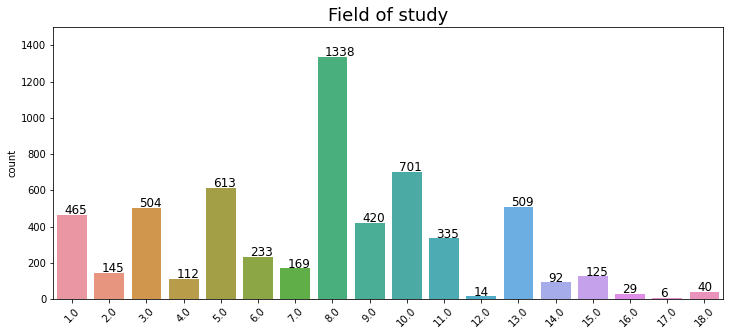

In [10]:
#let's visualize what is the number in each field
import seaborn as sns
plt.figure(figsize = (12,5))
ax = sns.countplot(x="field_cd", data=data)
plt.title('Field of study', fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.ylim(0, 1500)
plt.xlabel('')

for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+3, \
            str(round((i.get_height()), 1)), fontsize=12)

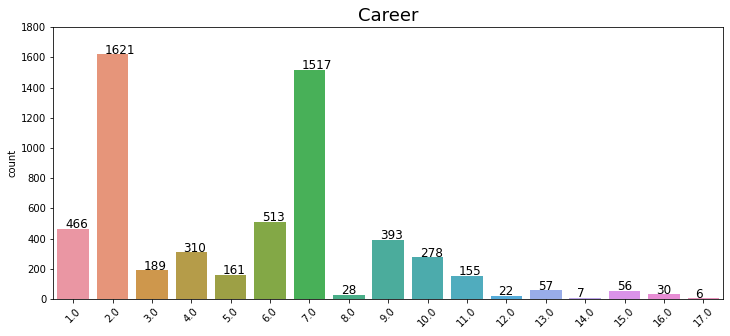

In [11]:
#let us visualize how many people in each career and what is the most common one
plt.figure(figsize = (12,5))
ax = sns.countplot(x="career_c", data=data)
plt.title('Career', fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.ylim(0, 1800)
plt.xlabel('')

for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+3, \
            str(round((i.get_height()), 1)), fontsize=12)

In [12]:
#fill null values with most common values
data['career_c']=data['career_c'].fillna(2)
data['field_cd']=data['field_cd'].fillna(8)

test_['career_c']=test_['career_c'].fillna(2)
test_['field_cd']=test_['field_cd'].fillna(8)

#x['field_cd']=x['field_cd'].fillna(x['field_cd'].mean())
#x['career_c']=x['career_c'].fillna(x['career_c'].mean())

#test['field_cd']=test['field_cd'].fillna(x['field_cd'].mean())
#test['career_c']=test['career_c'].fillna(x['career_c'].mean())

##Data Cleaning and preprocessing


In [13]:
#drop useless columns         
y=data['match']
x=data.drop(['partner','id','match','career','field','undergra','zipcode','idg','wave','pid'],axis=1)

In [14]:
test=test_.drop(['partner','id','career','field','undergra','zipcode','idg','wave','pid'],axis=1)

In [15]:
#define categorical features
x['field_cd']=x['field_cd'].astype('category')
x['career_c']=x['career_c'].astype('category')
x['income']=x['income'].astype('category')
x['from']=x['from'].astype('category')

In [16]:
#split features to numeric and categorical
features_numeric = list(x.select_dtypes(include=['float64', 'int64']))
features_categorical = list(x.select_dtypes(include=['category']))

In [17]:
np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)
#no of features=743

##First Model: Decision Tree
Firstly we'll try decision tree and tune hyperparameters using pipeline and search functions I expect high traing and test score with the tuned hyperparameters but grid search will be slow.

###Tune Pipeline

In [18]:
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn import tree
#set list of values in each hyperparameter
criterion = ['gini', 'entropy']
max_depth = [6,7,8,10,12,14]
dec_tree = tree.DecisionTreeClassifier()
parameters = dict(dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth)
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       #use feature selection function to select best features
                       ('feature_selection', SelectKBest(score_func=f_classif,k=350)),
                       ('dec_tree', dec_tree)])
pipe.fit(x,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'round',
                                                   'position', 'positin1',
                                                   'order', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha

###Trial 1: Decision Tree with Random search



In [19]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit
#use random search to find optimal hyperparameters
random_search_1 = RandomizedSearchCV(
    pipe, parameters, cv=4, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

random_search_1.fit(x, y)

print('best score {}'.format(random_search_1.best_score_))
print('best score {}'.format(random_search_1.best_params_))

Fitting 4 folds for each of 10 candidates, totalling 40 fits
best score 0.8128086361695501
best score {'dec_tree__max_depth': 6, 'dec_tree__criterion': 'entropy'}


In [20]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = test_['id']
submission['match'] = random_search_1.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough1.csv', index=False)

**Validation Score is: 0.813**

**Test score is: 0.79943**

###Trail 2: Decision Tree with BayesianSearch

In [21]:
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
bayes_search_1 = BayesSearchCV(
    pipe, parameters, cv=6, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=15,
    scoring='roc_auc')

bayes_search_1.fit(x, y)

print('best score {}'.format(bayes_search_1.best_score_))
print('best score {}'.format(bayes_search_1.best_params_))

Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 6 folds for each of 1 candidates, totalling 6 fits
best score 0.8079653502055942
best score OrderedDict([('dec_tree__criterion', 'entropy'), ('dec_tree__max_depth', 6)])


In [22]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = test_['id']
submission['match'] = bayes_search_1.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough2.csv', index=False)

**Validation Score is: 0.808**

**Test score is: 0.80016**

###Trial 3: Decision Tree with GridSearch

In [23]:
grid_search_1 = GridSearchCV(
    pipe, parameters, cv=6, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search_1.fit(x, y)
print('best score {}'.format(grid_search_1.best_score_))
print('best score {}'.format(grid_search_1.best_params_))

Fitting 6 folds for each of 12 candidates, totalling 72 fits
best score 0.8086432292223028
best score {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 6}


In [24]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = test_['id']
submission['match'] = grid_search_1.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough3.csv', index=False)

**Validation Score is: 0.809**

**Test score is: 0.82575**

### **As I expected bayesian and random is faster than grid search and all give us same hyperparameters and too close in result but the score not as I expected so Let's try another type of model**

##Second Model: XGBoost Classifier
I expect for this model that the score will be better than decision tree.

###Tune Pipeline

In [25]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline_2 = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('feature_selection', SelectKBest(score_func=f_classif,k=350)),
                                 ('my_classifier', XGBClassifier())])
full_pipline_2.fit(x,y)
param_grid = {'preprocessor__num__imputer__strategy': ['mean'],
             # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
             'my_classifier__n_estimators': [10,20,25, 30, 40,50,60,70,80],  
             # my_classifier__n_estimators points to my_classifier->n_estimators 
             'my_classifier__max_depth':[5,10, 20, 30,40,50] }

###Trial 4: XGboost with Random Search 


In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

random_search_2 = RandomizedSearchCV(
    full_pipline_2, param_grid, cv=5, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

random_search_2.fit(x, y)

print('best score {}'.format(random_search_2.best_score_))
print('best score {}'.format(random_search_2.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score 0.8778907753489491
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 50, 'my_classifier__max_depth': 5}


In [27]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = test_['id']
submission['match'] = random_search_2.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough4.csv', index=False)

**Validation Score is: 0.8779**

**Test score is: 0.87169**

###Trial 5: XGBoost with Bayesian Search

In [28]:
bayes_search_2 = BayesSearchCV(
    full_pipline_2, param_grid, cv=5, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=20,
    scoring='roc_auc')

bayes_search_2.fit(x, y)

print('best score {}'.format(bayes_search_2.best_score_))
print('best score {}'.format(bayes_search_2.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [29]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = test_['id']
submission['match'] = bayes_search_2.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough5.csv', index=False)

**Validation Score is: 0.8807**

**Test score is: 0.87307**

###Trial 6: XGBoost clasifier with Grid Search


In [30]:
# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search_2 = GridSearchCV(
    full_pipline_2, param_grid, cv=3, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search_2.fit(x, y)
print('best score {}'.format(grid_search_2.best_score_))
print('best score {}'.format(grid_search_2.best_params_))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
best score 0.8757804576167724
best score {'my_classifier__max_depth': 5, 'my_classifier__n_estimators': 80, 'preprocessor__num__imputer__strategy': 'mean'}


In [31]:
#predict output and save submission
submission = pd.DataFrame()
submission['id'] = test_['id']
submission['match'] = grid_search_2.predict_proba(test)[:,1]
submission.to_csv('sample_submission_walkthrough6.csv', index=False)

**Validation Score is: 0.8758**

**Test score is: 0.87866**

###**As I expected, XGboost model is better than decision tree and the score in bayesian and grid search are the best.**

##Problem Formulation

We are going to predict the outcome of a specific speed dating session based on the profile of two people, so we can implement a recommendation system to better match people in speed dating events.

The problem is the dataset has a lot of missing values and highly unbalanced(mostly unmatched).

###What is the input?

In [32]:
for col in x.columns:
    print(col)

gender
condtn
round
position
positin1
order
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
like_o
prob_o
met_o
age
field_cd
mn_sat
tuition
race
imprace
imprelig
from
income
goal
date
go_out
career_c
sports
tvsports
exercise
dining
museums
art
hiking
gaming
clubbing
reading
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
attr3_1
sinc3_1
fun3_1
intel3_1
amb3_1
attr5_1
sinc5_1
intel5_1
fun5_1
amb5_1
attr
sinc
intel
fun
amb
shar
like
prob
met
match_es
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
intel3_s
fun3_s
amb3_s
satis_2
length
numdat_2
attr7_2
sinc7_2
intel7_2
fun7_2
amb7_2
shar7_2
attr1_2
sinc1_2
intel1_2
fun1_2
amb1_2
shar1_2
attr4_2
sinc4_2
intel4_2
fun4_2
amb4_2
shar4_2
attr2_2
sinc2_2
intel2_2
fun2_2
amb2_2
shar2_2
attr3_2
sinc3_2

###What is the output?

The output is to predict the probability (0-1, float) that the dating session will lead to a successful match.

###What data mining function is required?

Load and Clean the data

Fill null values

Drop useless columns

Use Feature selection function

Use one hot incoding with categorical data

Using pipeline, gridsearch, random search and bayesian search

###What could be the challenges?

Filling null values and use feature selection function to neglect useless features then select best classifier to meet our expectations with this unbalanced data.

###What is the impact?

The model can predict the probability that the dating session will lead to a successful match based on the profile of two people before they meet actually.

###What is an ideal solution?


XGBoost Classifier better than Decision tree. GridSearch, random search and bayesian are very close to each other in score but bayesian search is the best because it doesn't take alot of time like grid search and give us more acurate values than random search.

###What is the experimental protocol used and how was it carried out?

GridSearch
, RandomSearch and Bayesian Search

The best one is gridsearch it takes alot of time but it give us best values then bayesian search. As we know bayesian search do trials depend on each other not like random search and that wahat make it better than random and better than grid because it takes random trials but dependency and that makes it doesn't take alot of time.

###What preprocessing steps are used?



Fill null values

Drop useless festures

Use Feature selection function

Use one hot incoding with categorical data

##Questions

###🌈 Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?


Because Linear regression is predicting continuous values, such as predicting the price of a property. Its prediction output can be any real number.
Whereas logistic regression is for classification problems, which predicts a probability range between 0 to 1. Like, predict whether a customer will make a purchase or not.

###🌈   What's a decision tree and how it is different to a logistic regression model?



Decision tree can deal with classification problems and regression too, it depends on splitting fetures and take decisions depend on them till finish them all and give us the final decision.


Dicision tree are more likely to overfit the data and when we have noise it will be big problem but Logistic regression performs better while we have noise in data.

###🌈What's the difference between grid search and random search?

In random search not all values will be tested it takes random values and that make it maybe give us best value or not whereas grid search will give us the best values because all values will be tested.
Random search does not take time like grid one.

Grid search (global optimal) is expensive when you specify a large search space. Alternatively, random search CV give you local optimal (may be good enough and even more generalizable)

###🌈What's the difference between bayesian search and random search?

Bayesian search uses the results from the previous iteration to decide the next hyperparameter value candidates not like random search random search does not have memory it take random values not depending on any previous thing or coming one.

Bayesian methods can find the best hyperparameters in lesser time (in fewer iterations) than both grid search and random search.